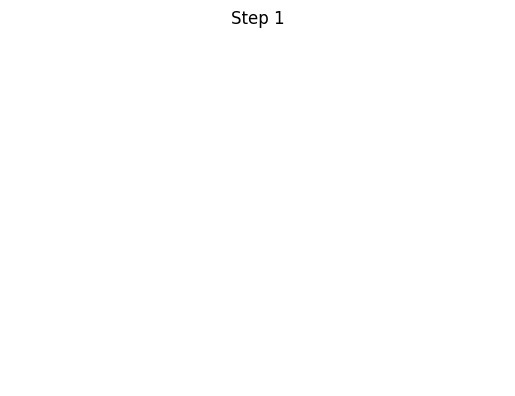

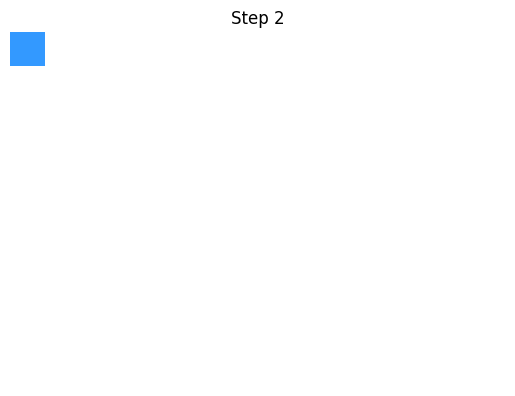

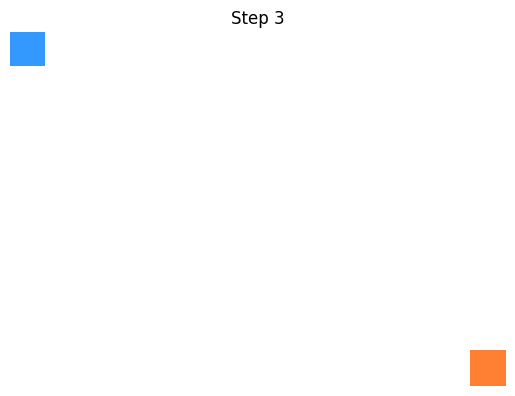

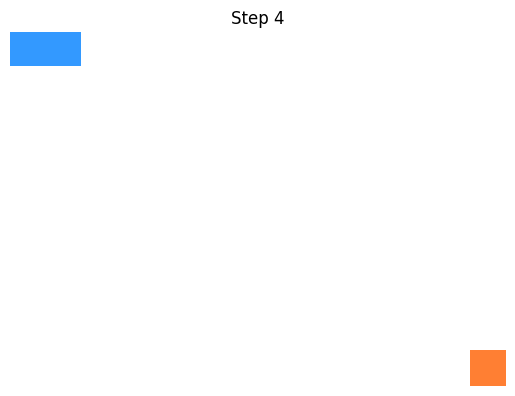

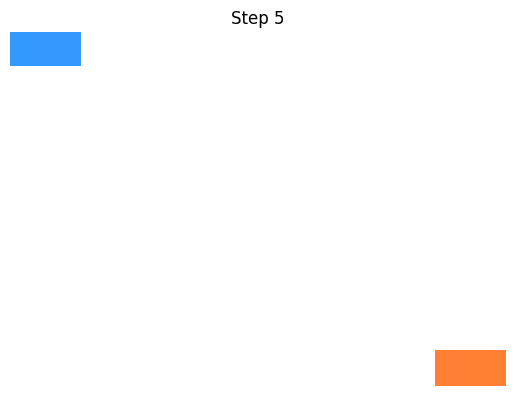

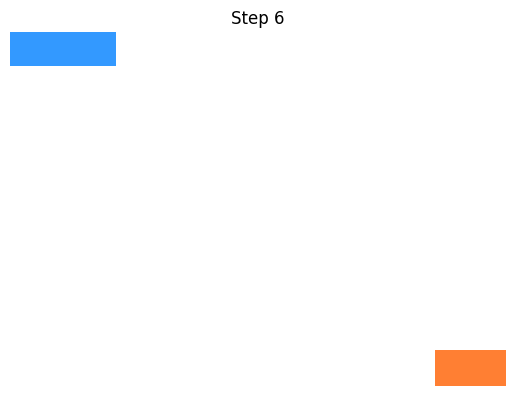

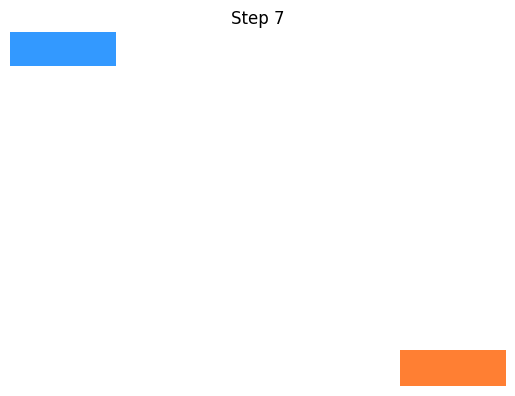

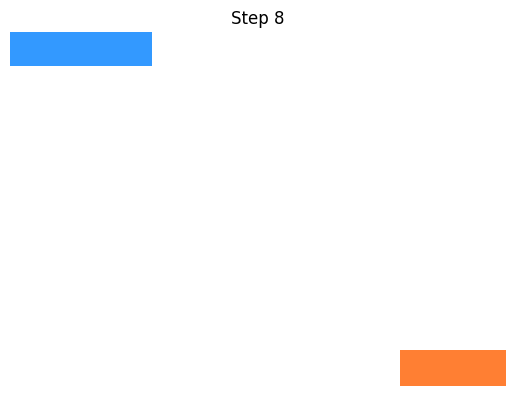

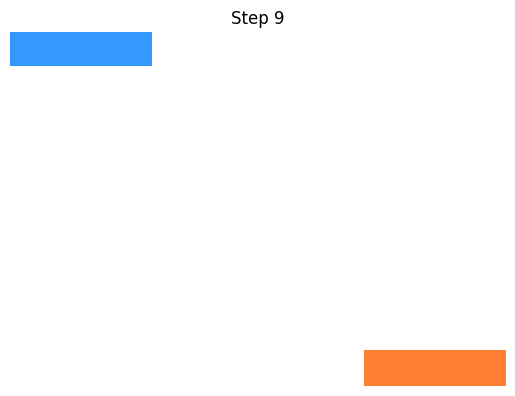

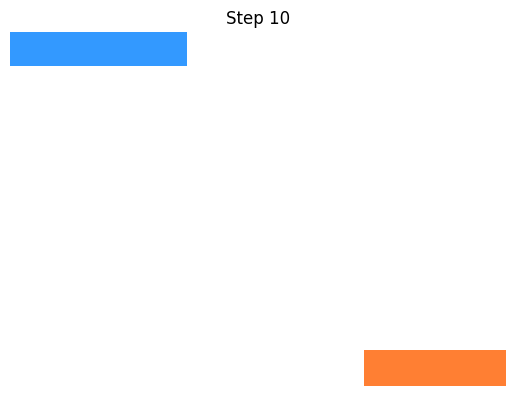

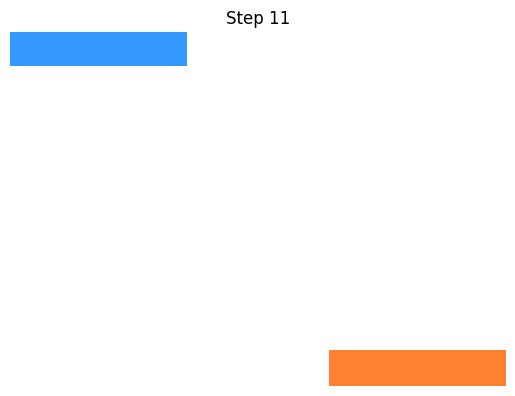

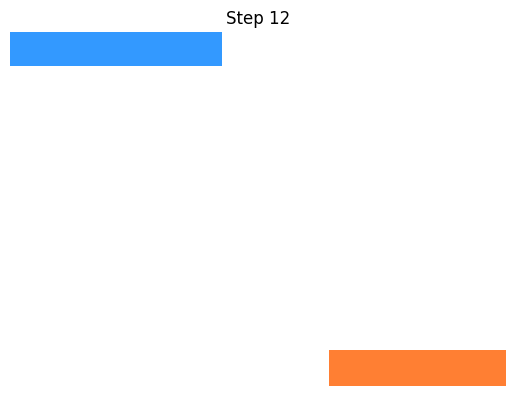

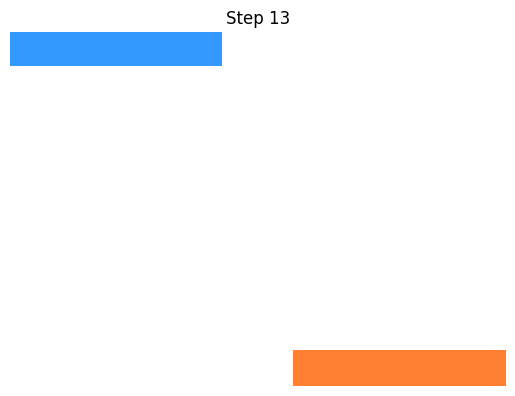

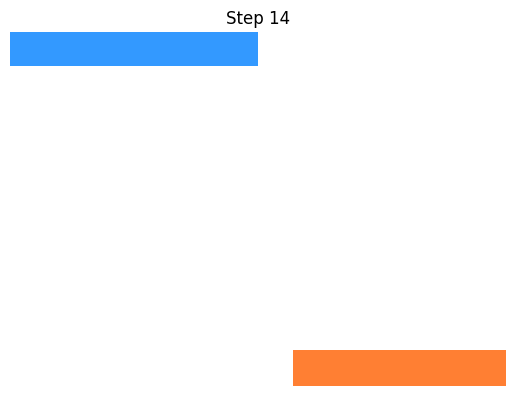

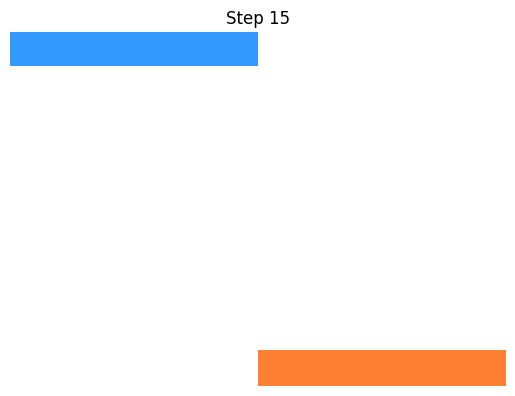

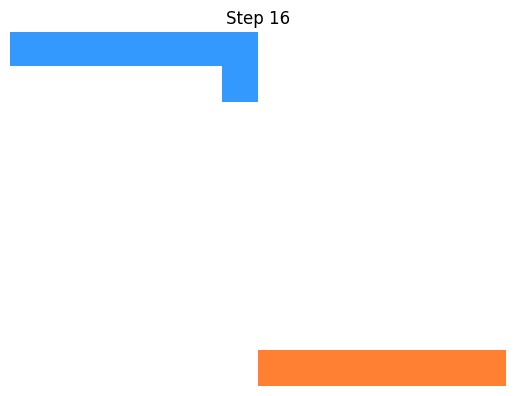

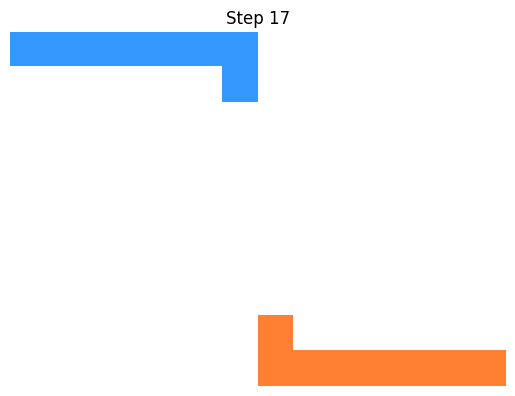

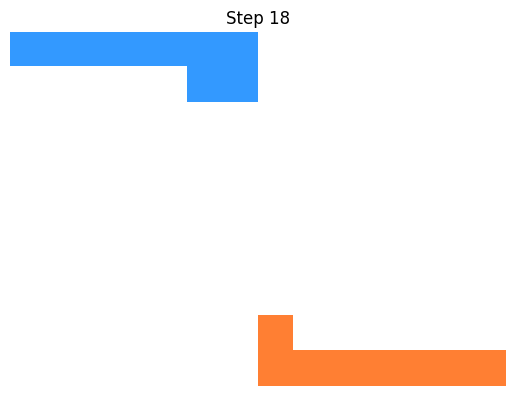

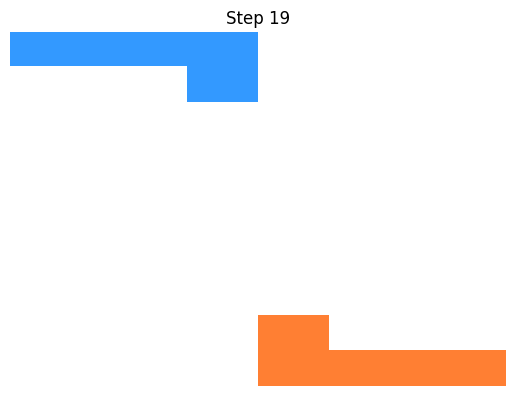

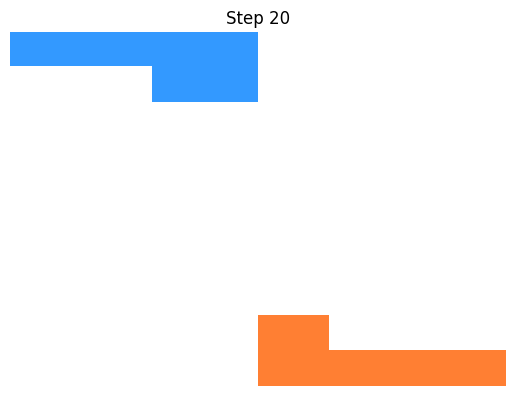

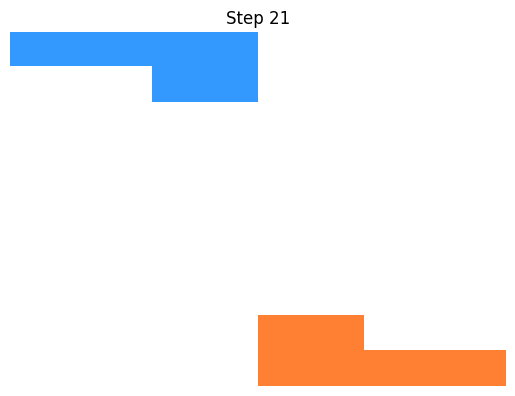

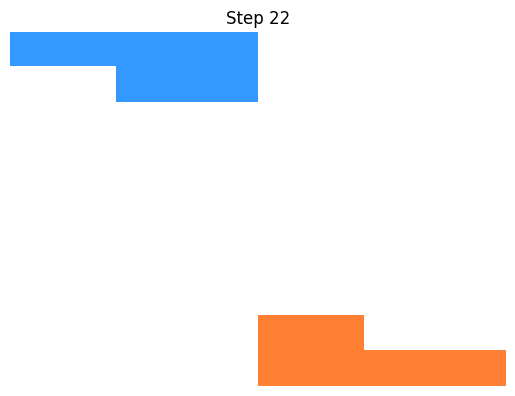

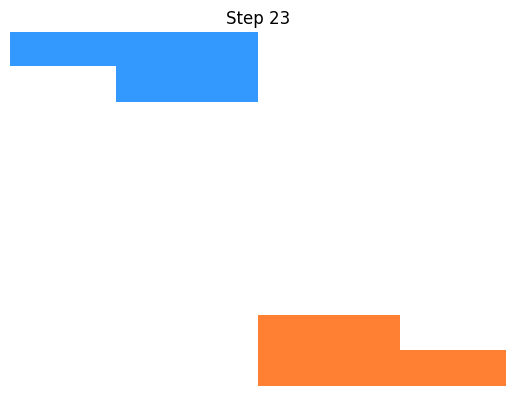

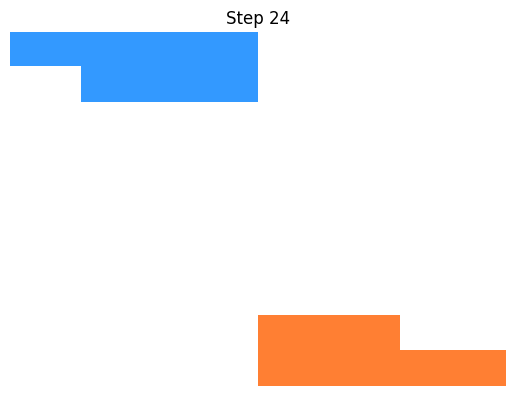

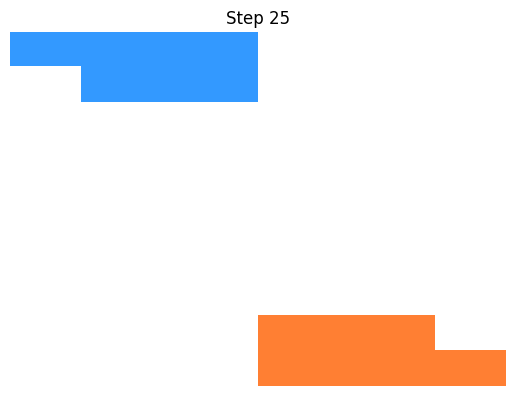

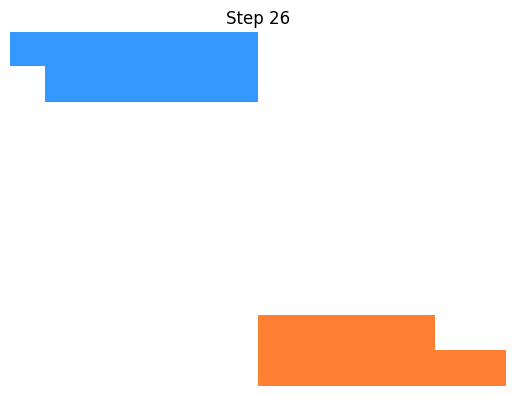

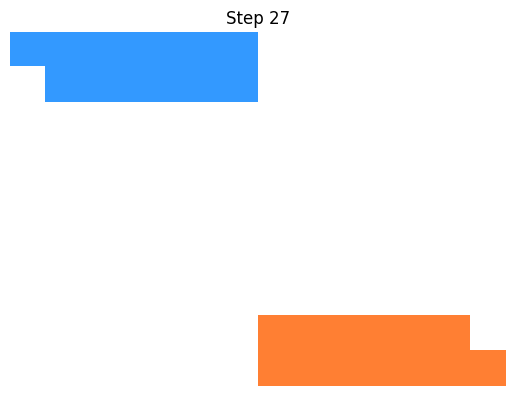

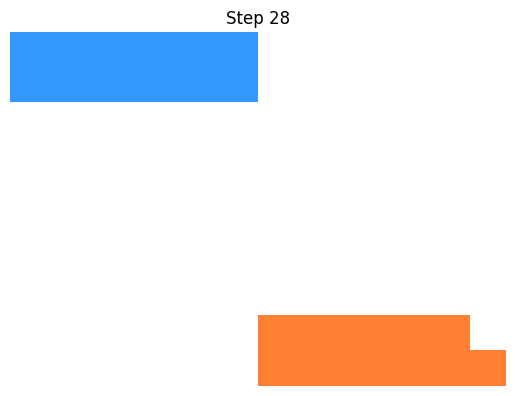

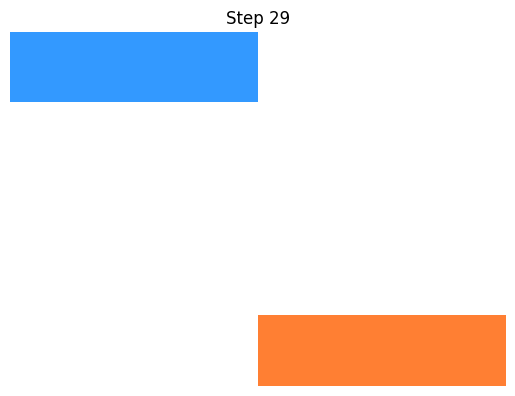

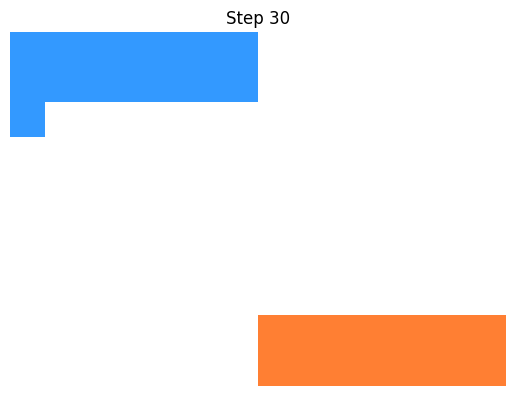

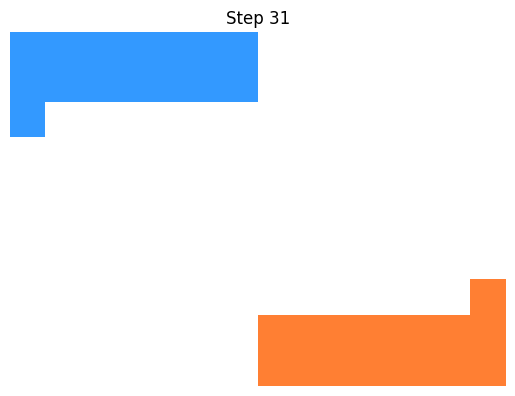

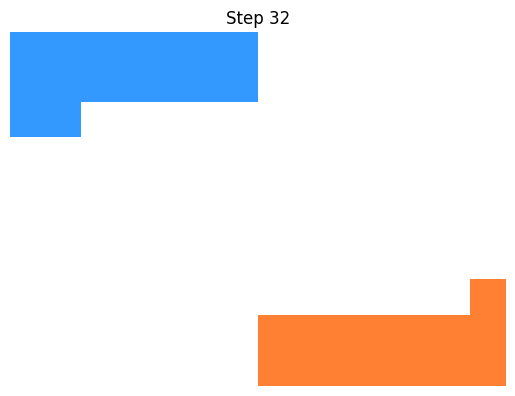

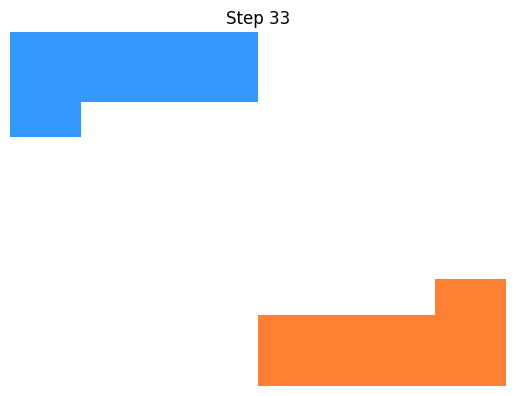

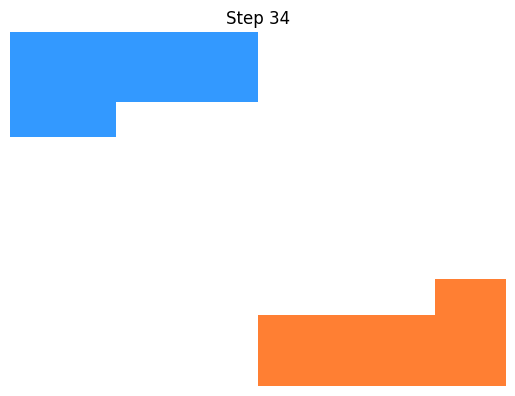

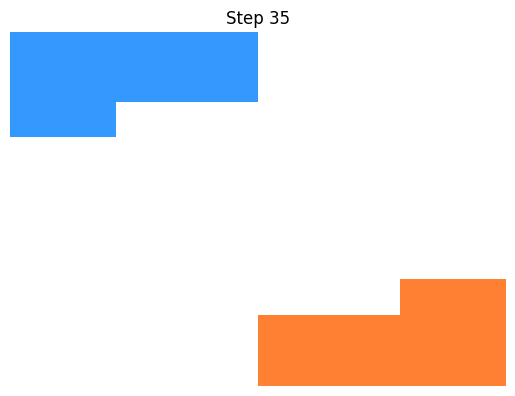

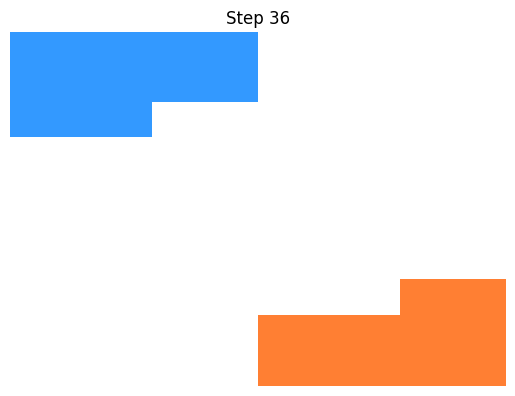

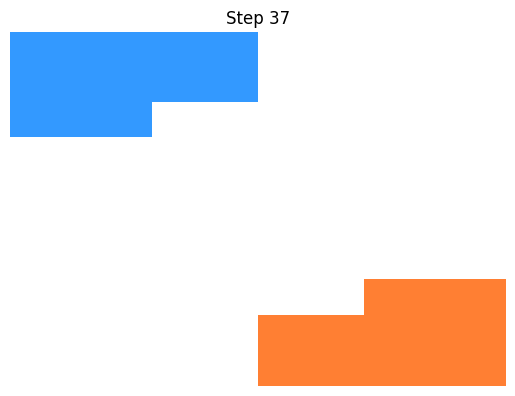

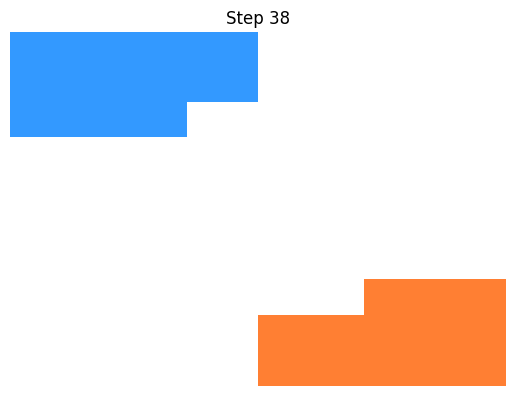

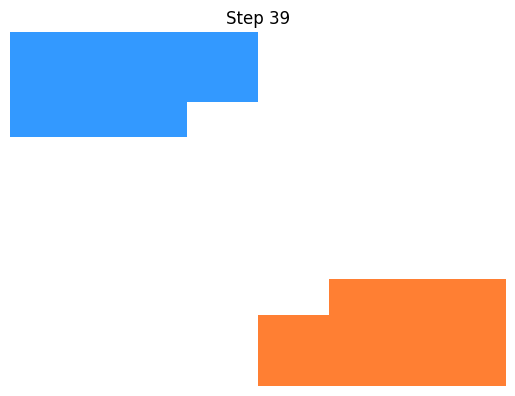

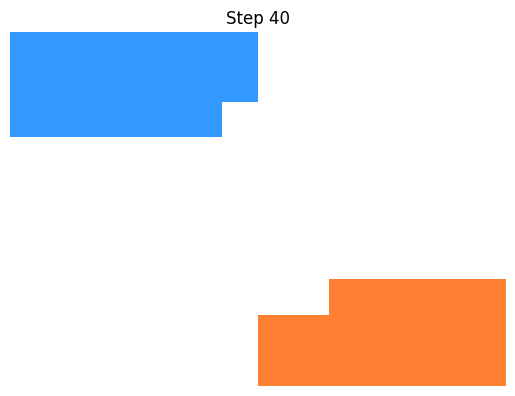

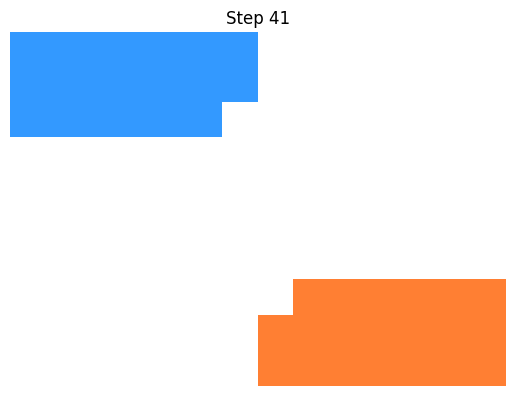

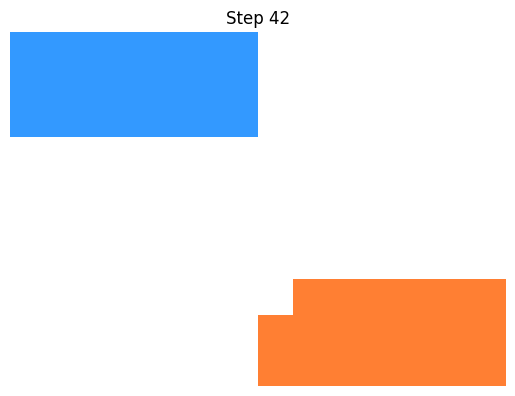

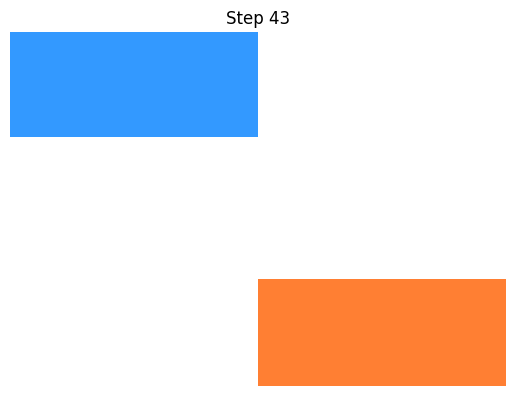

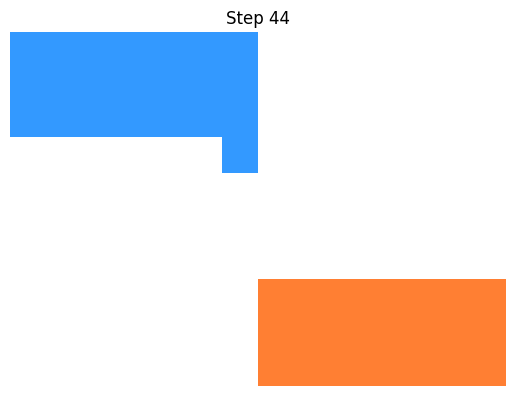

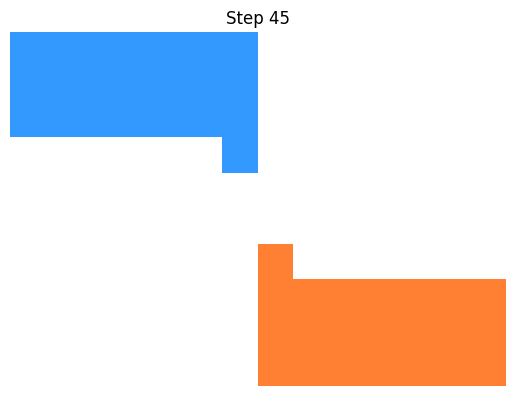

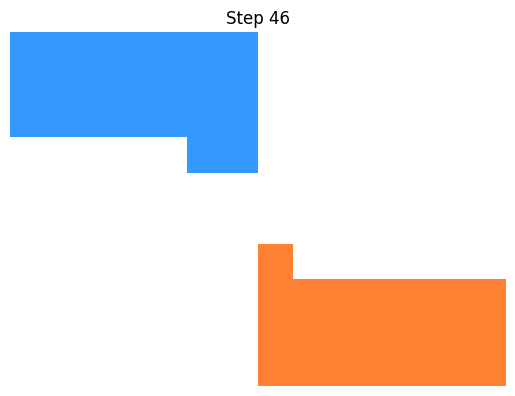

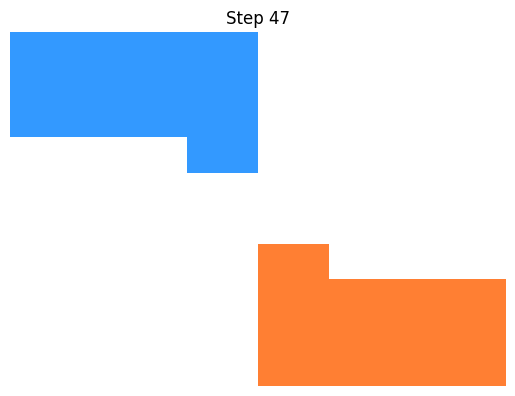

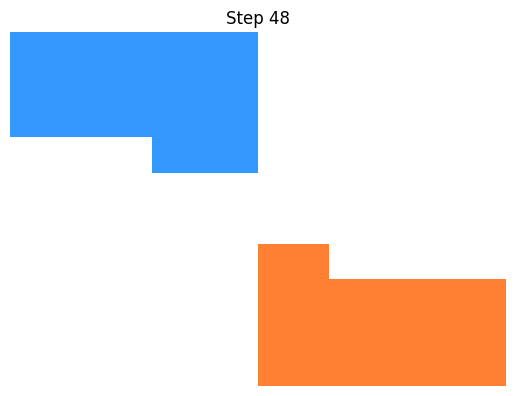

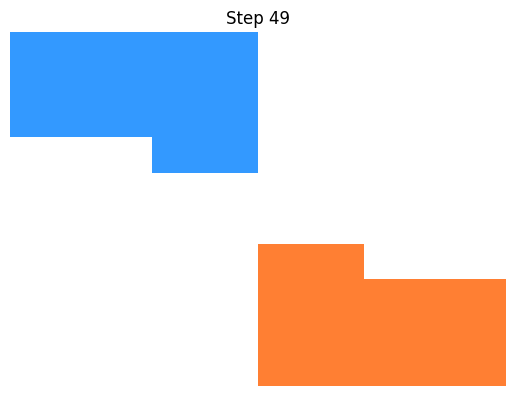

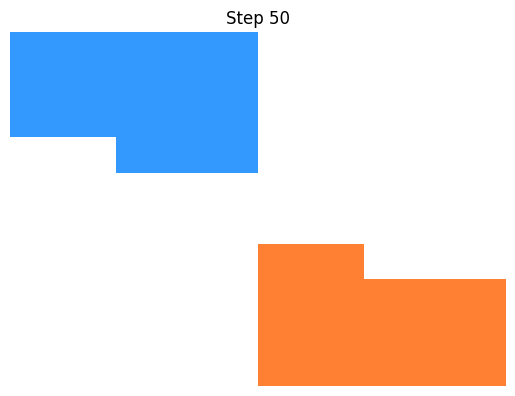

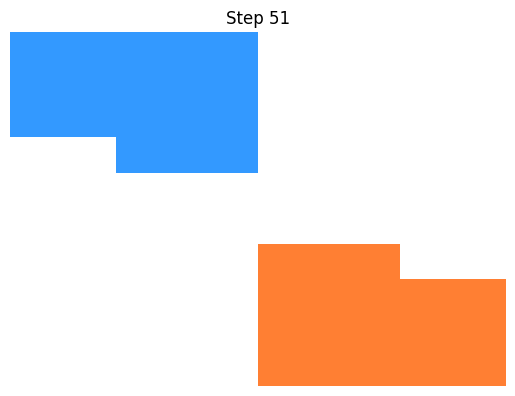

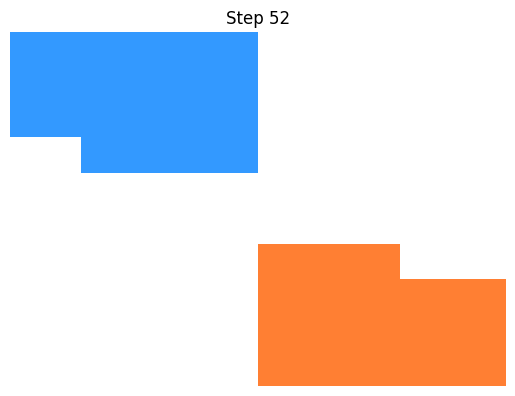

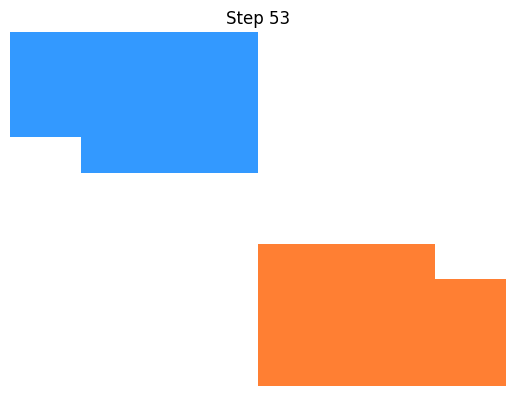

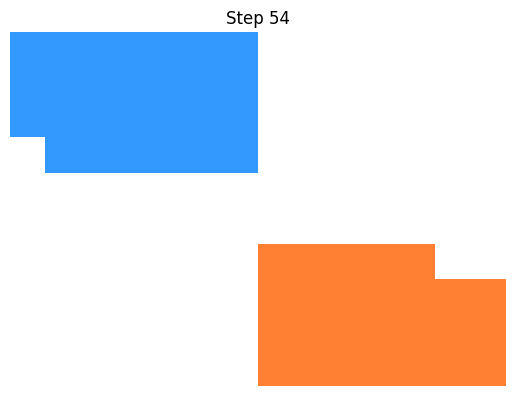

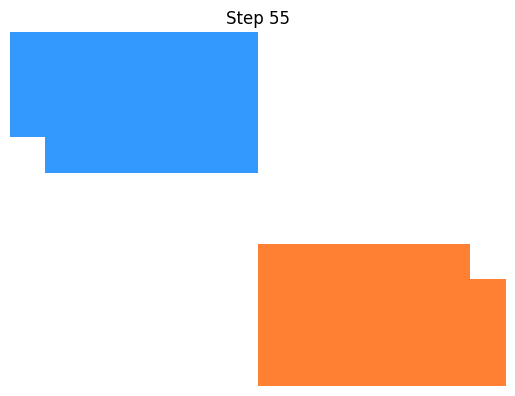

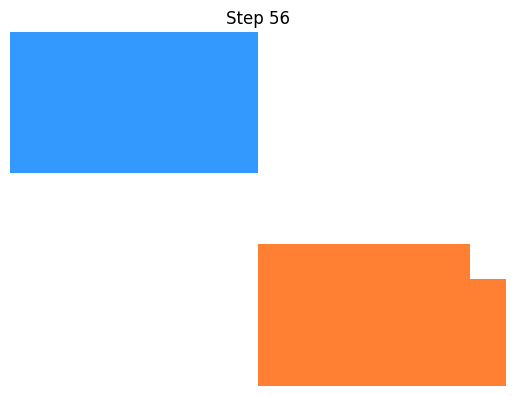

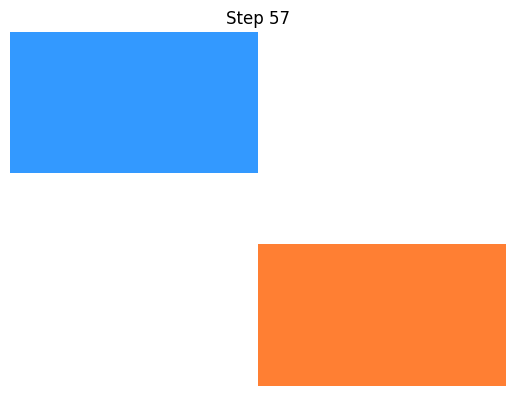

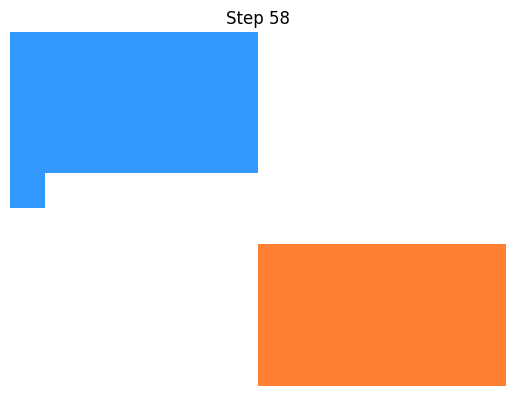

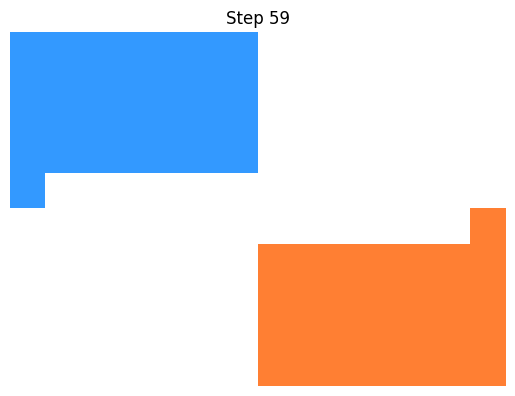

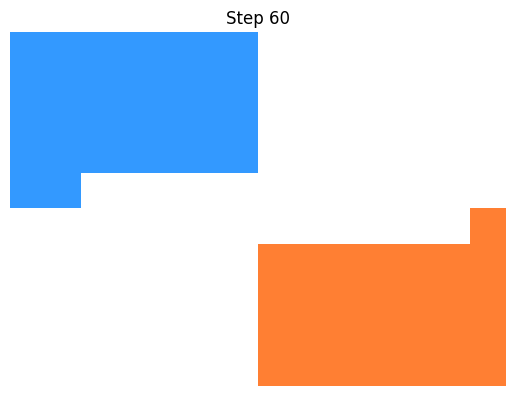

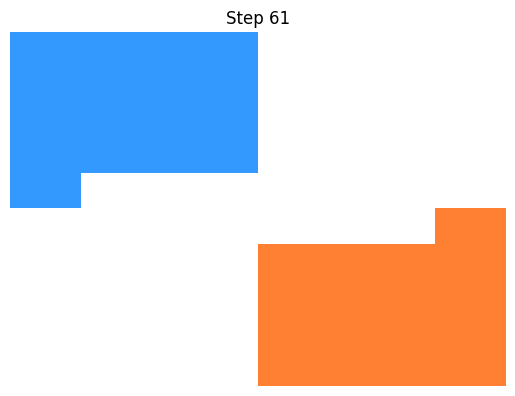

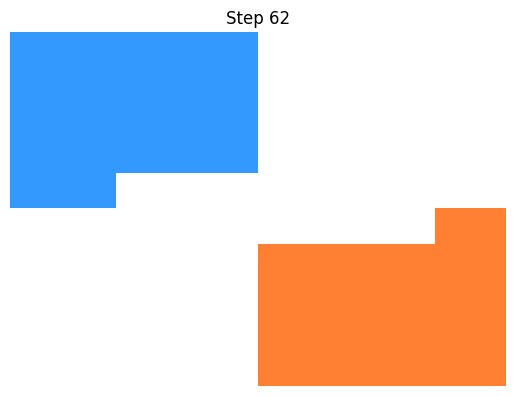

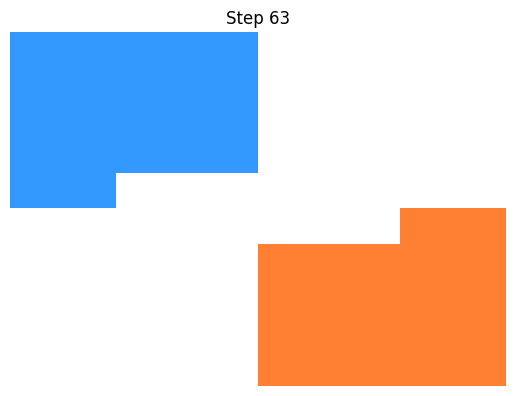

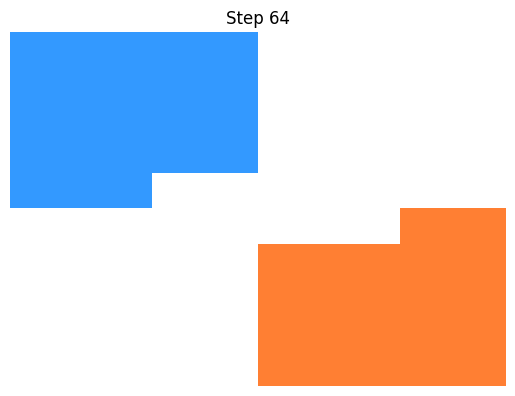

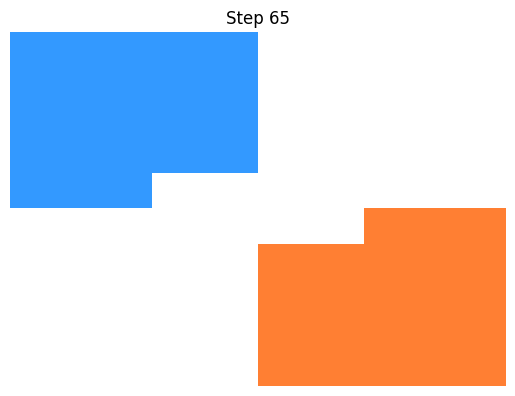

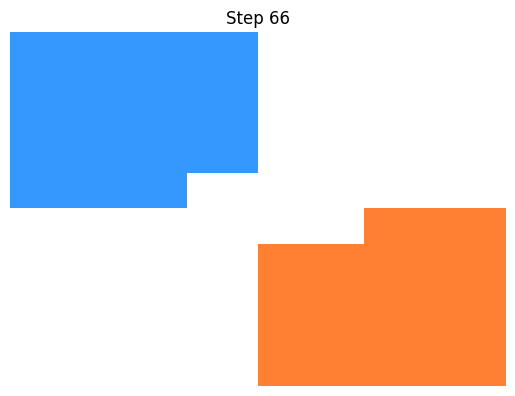

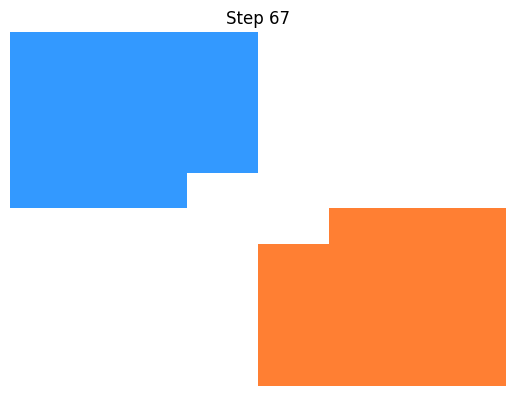

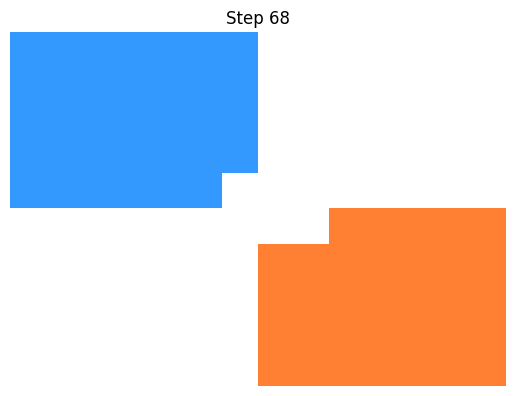

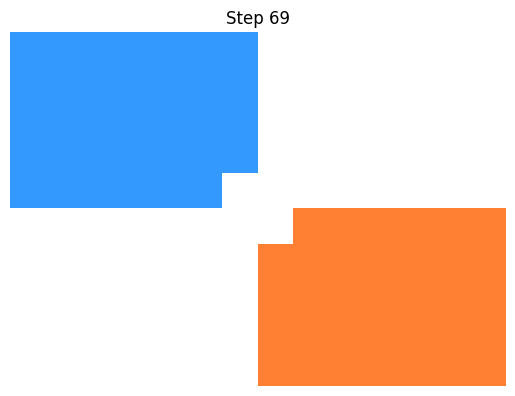

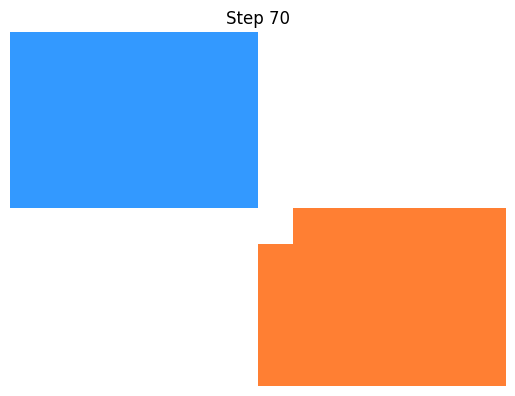

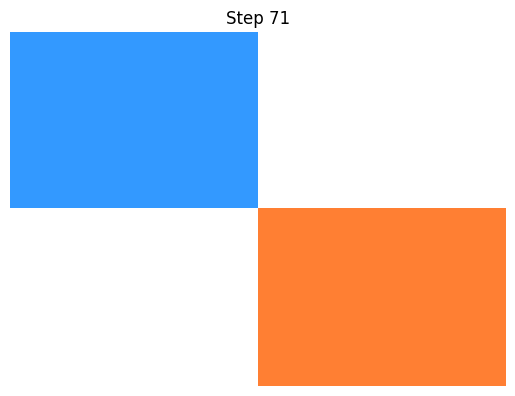

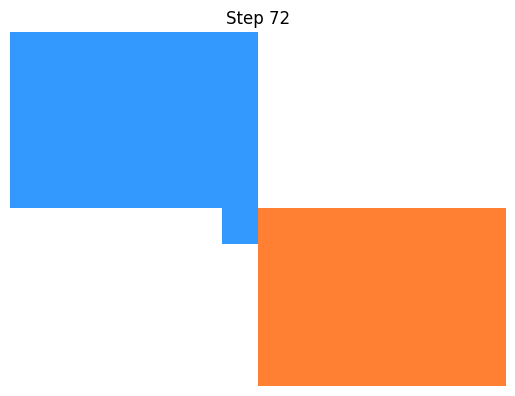

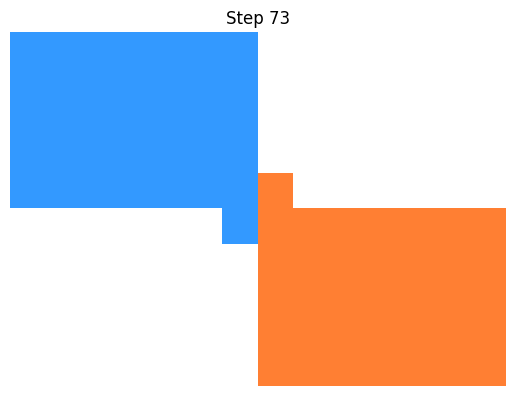

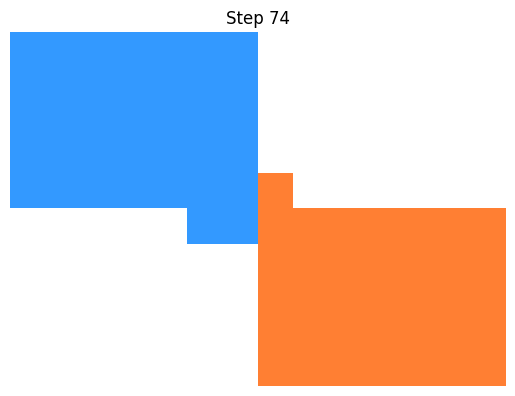

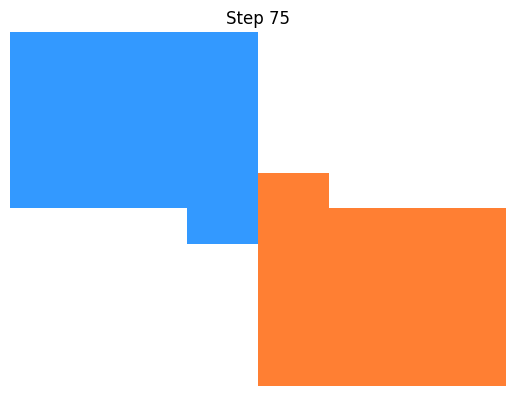

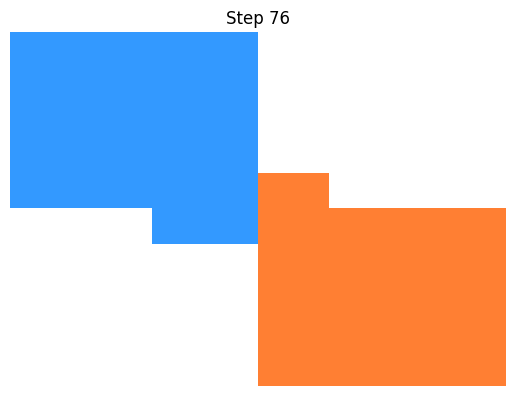

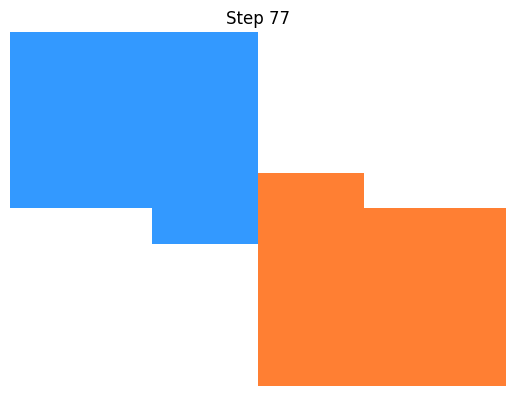

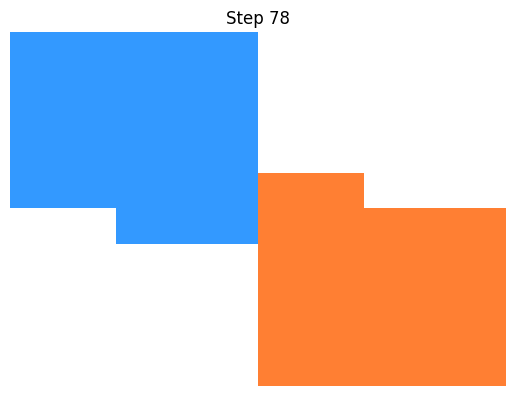

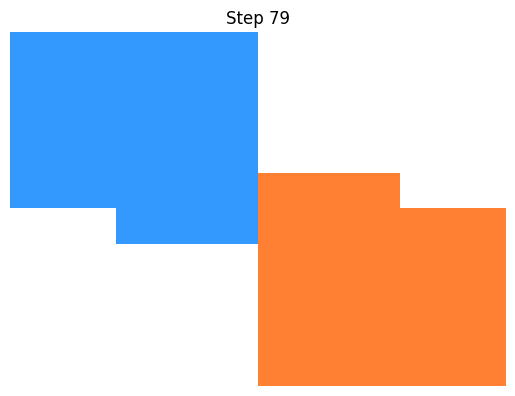

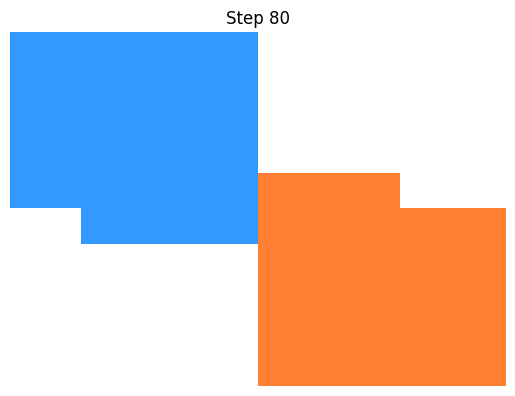

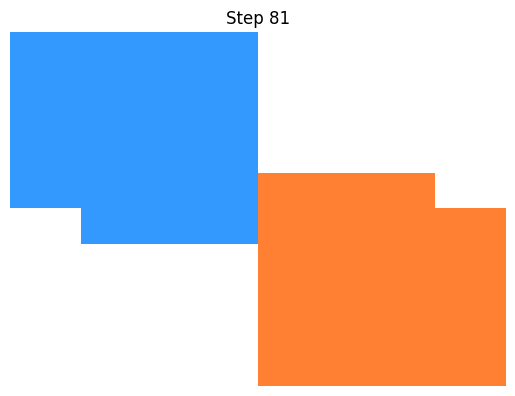

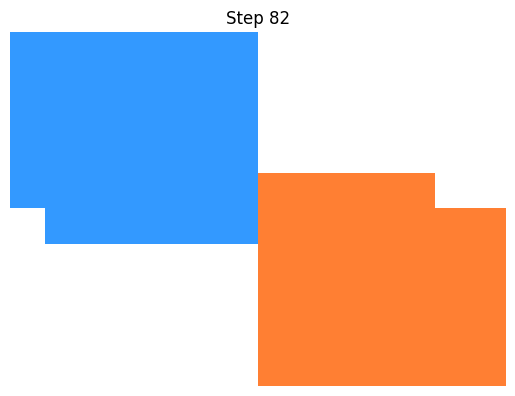

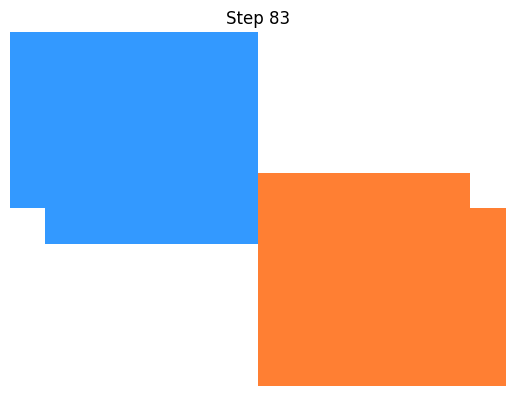

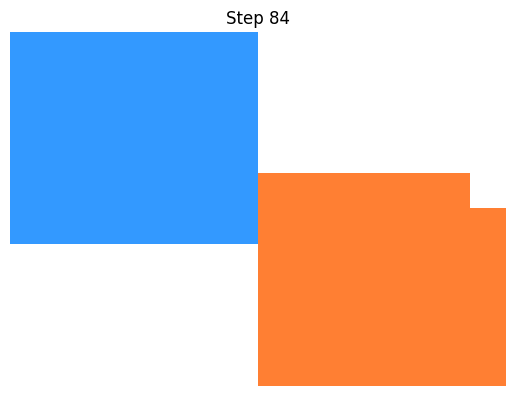

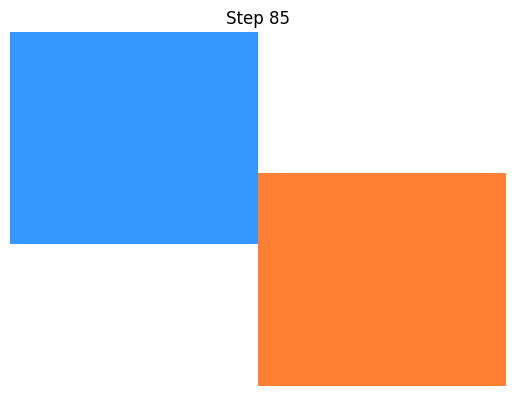

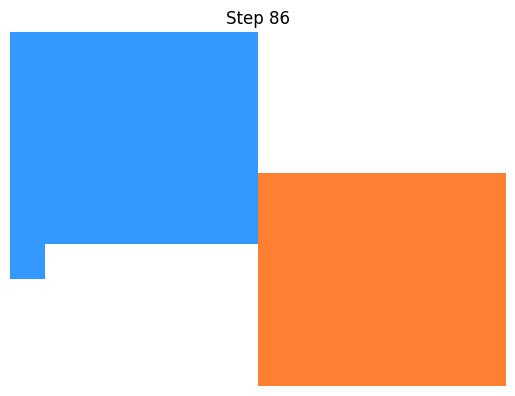

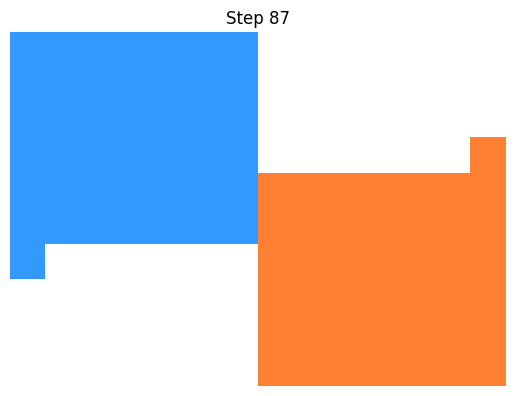

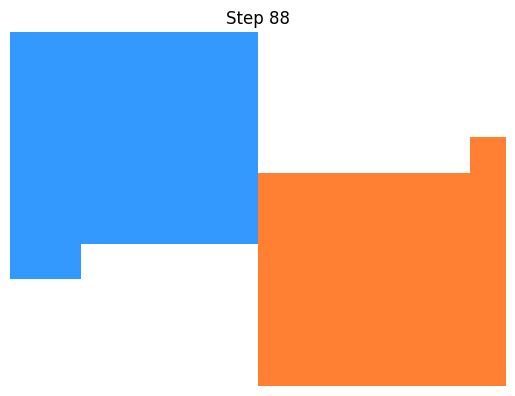

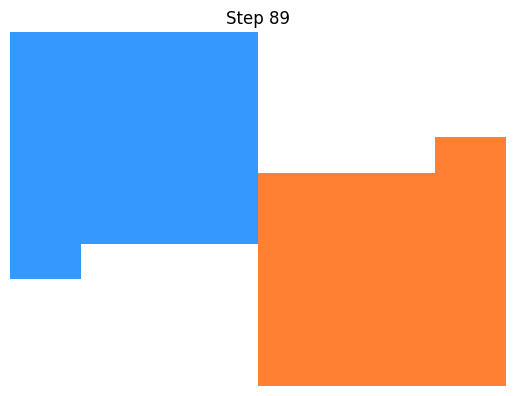

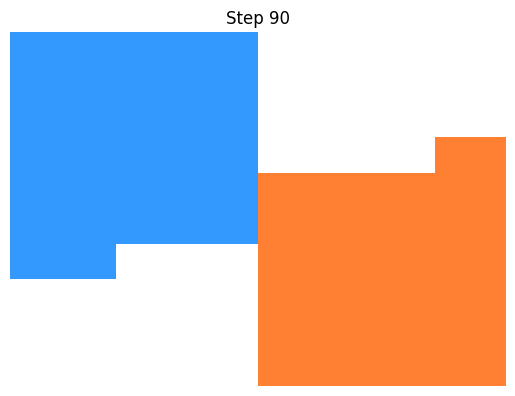

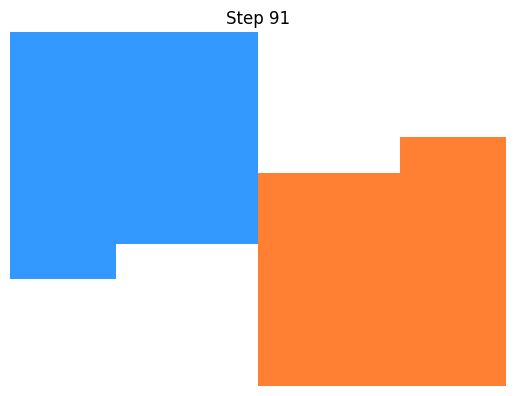

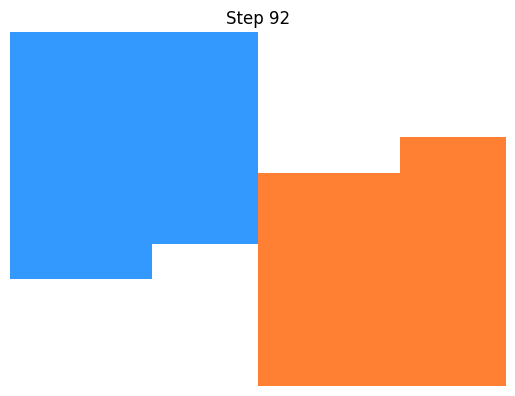

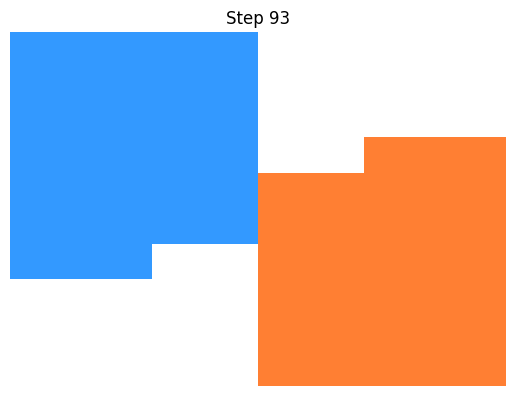

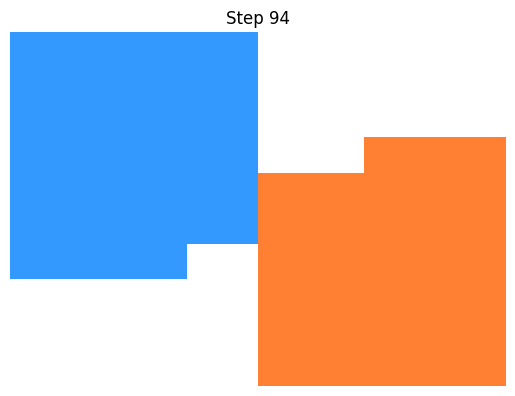

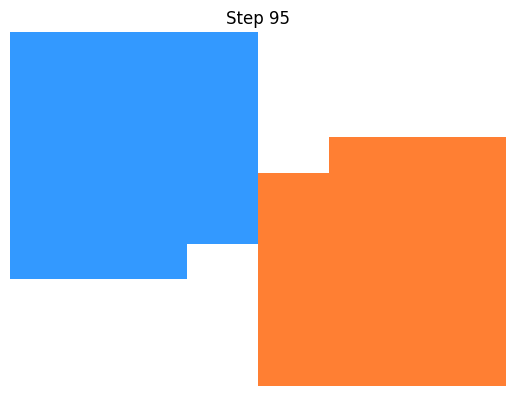

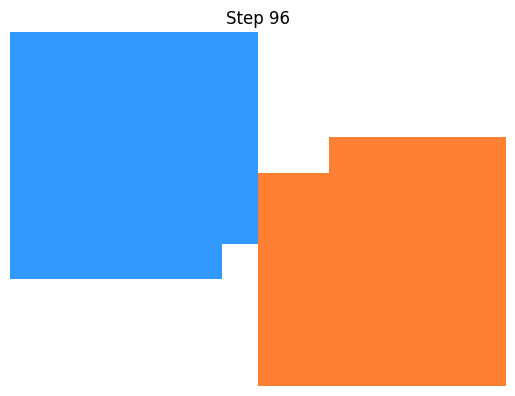

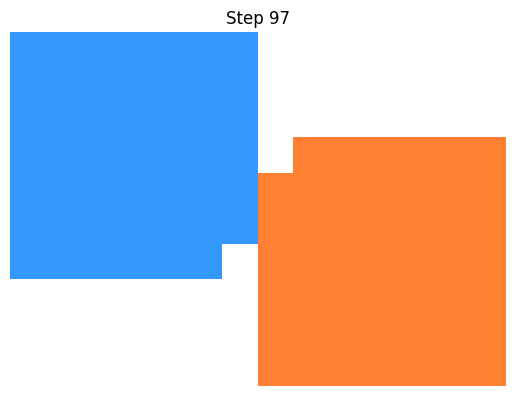

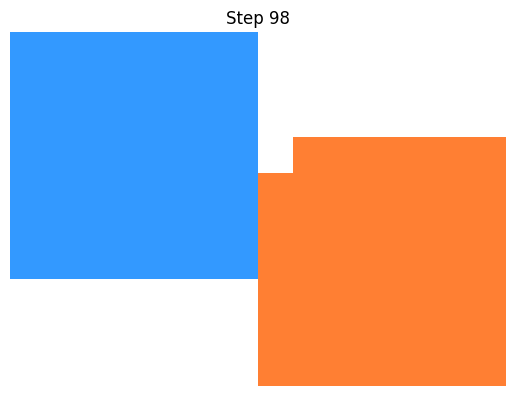

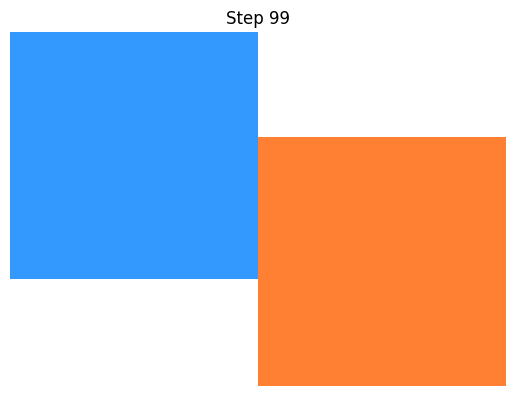

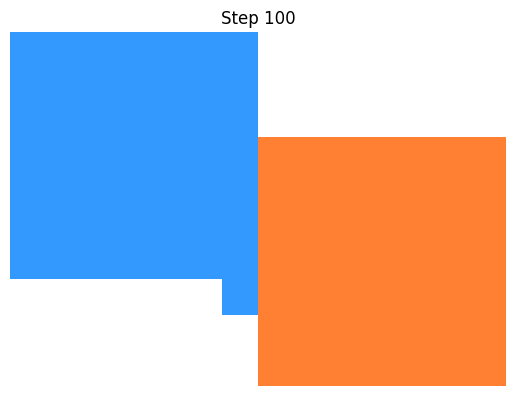

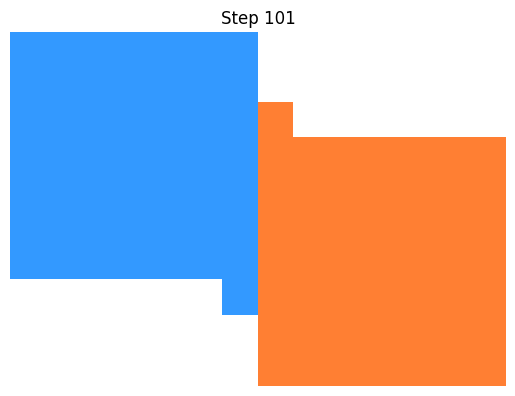

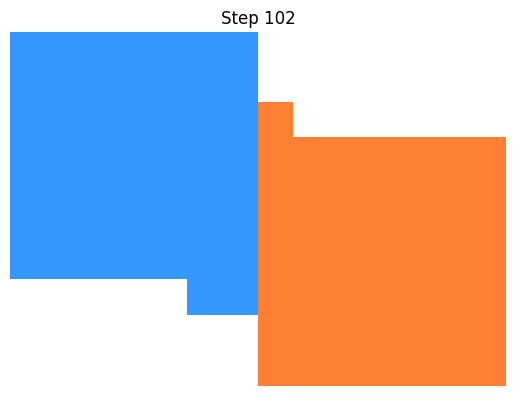

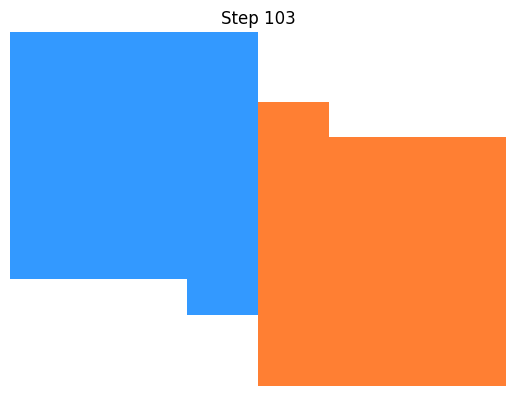

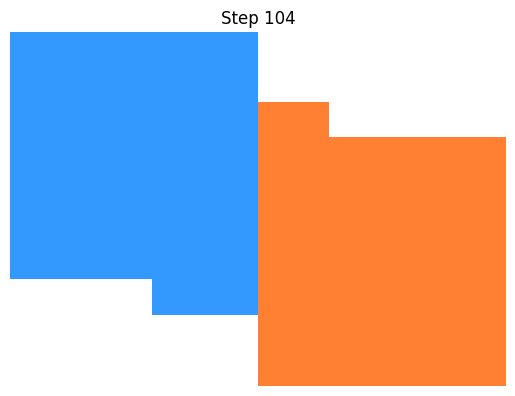

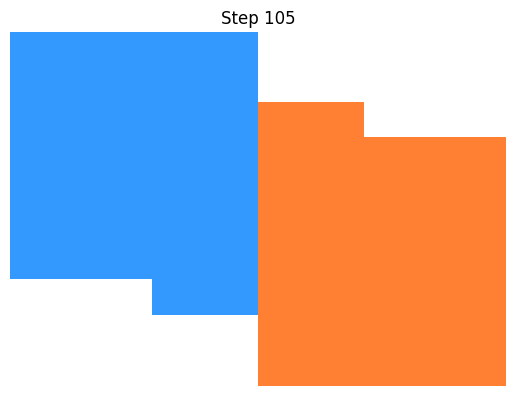

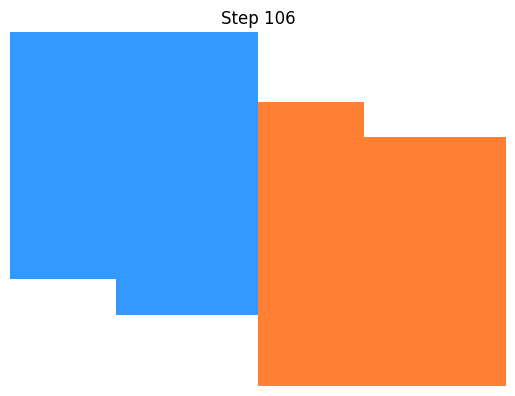

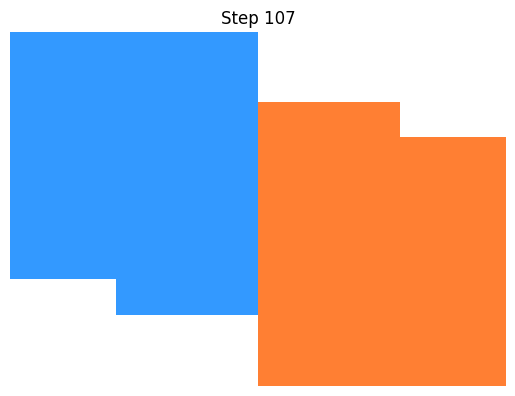

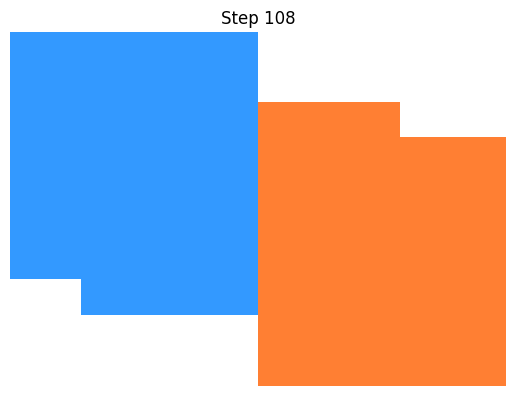

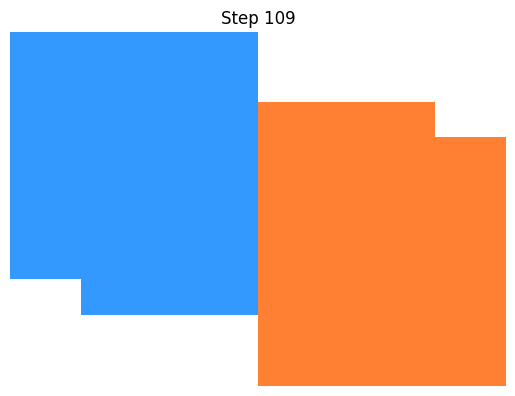

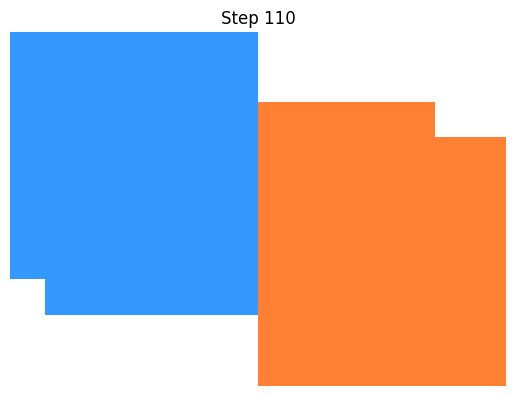

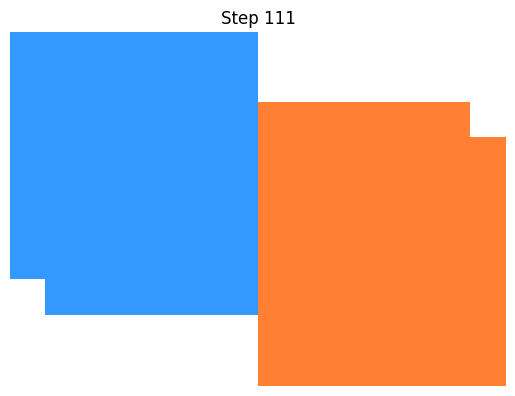

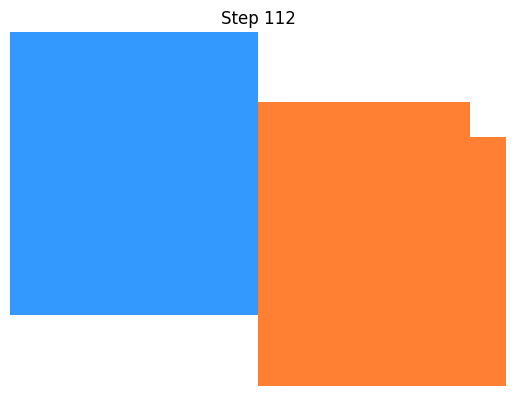

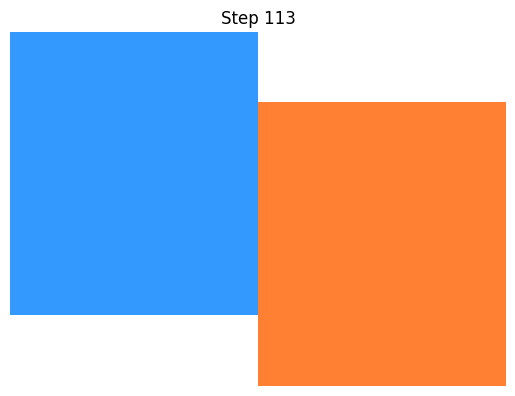

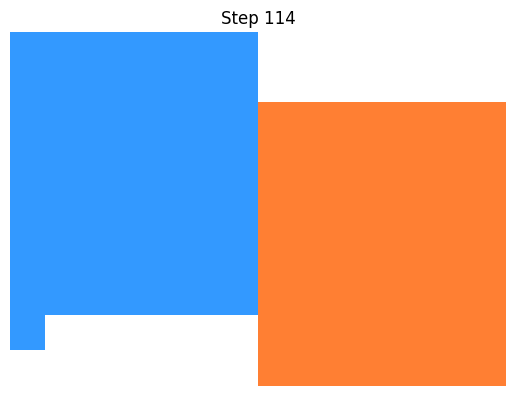

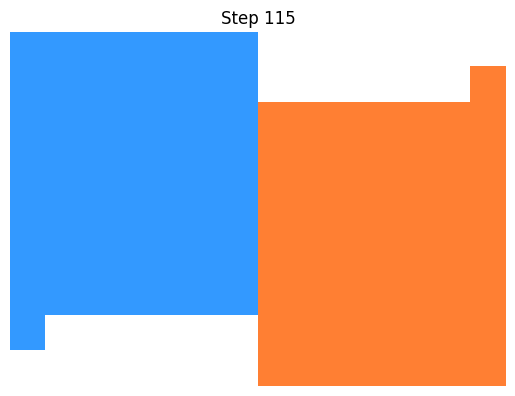

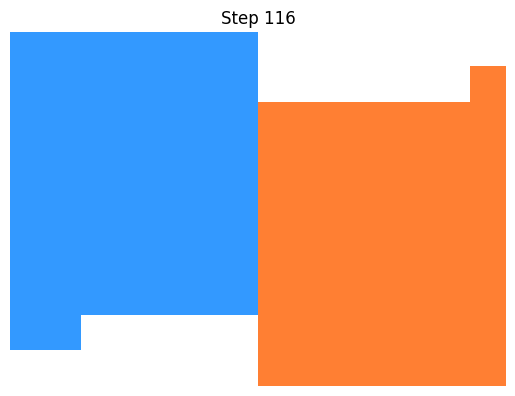

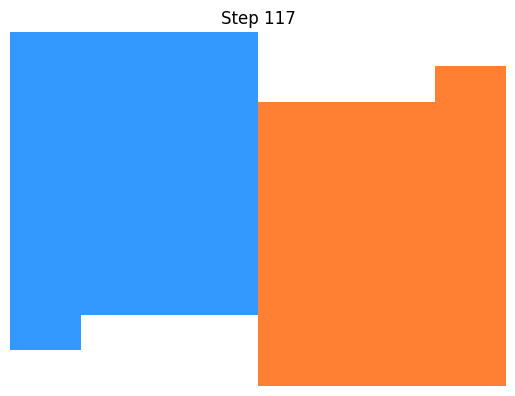

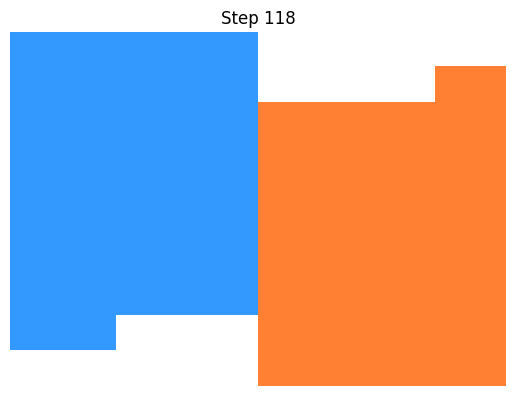

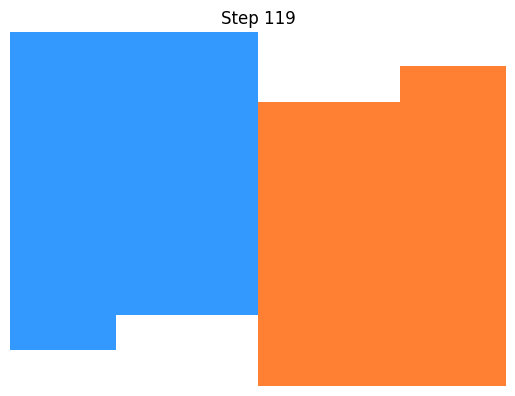

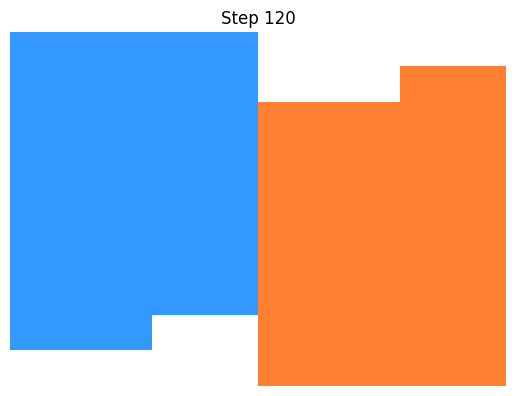

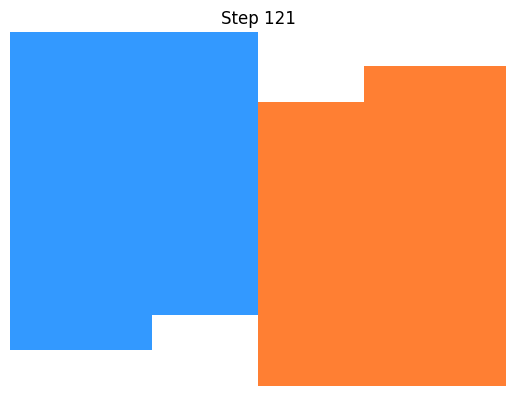

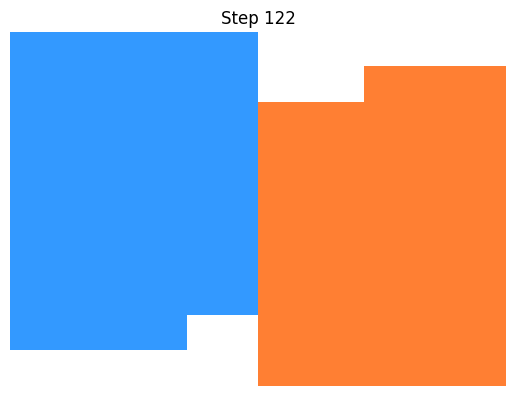

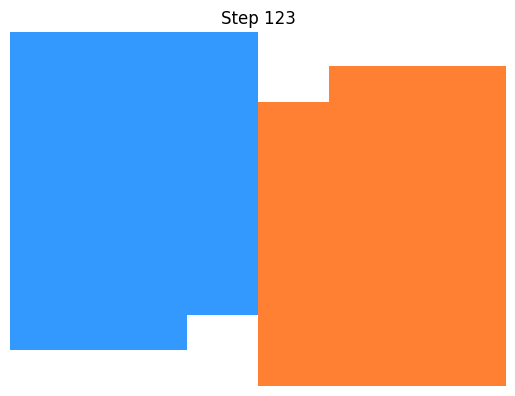

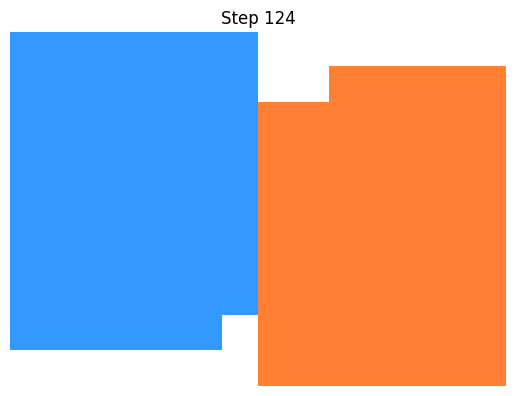

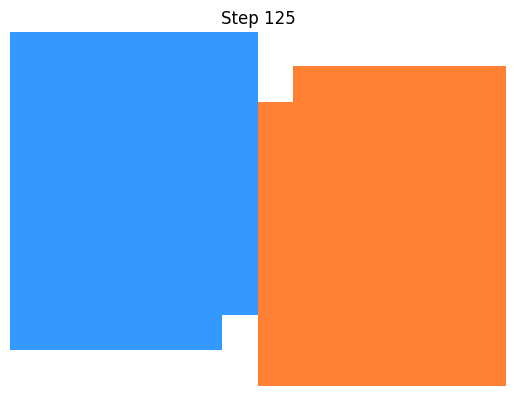

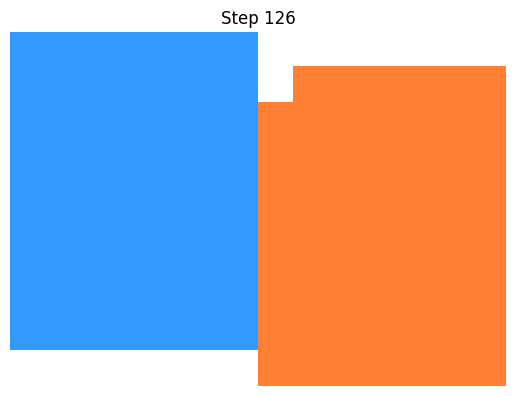

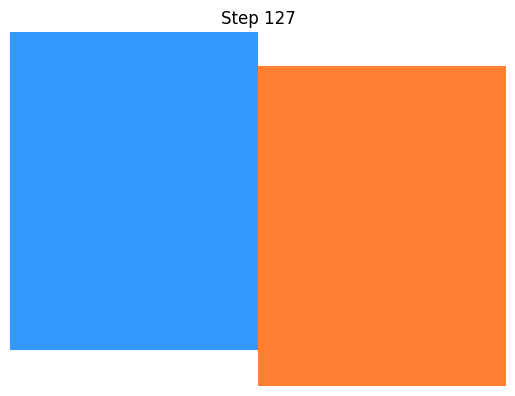

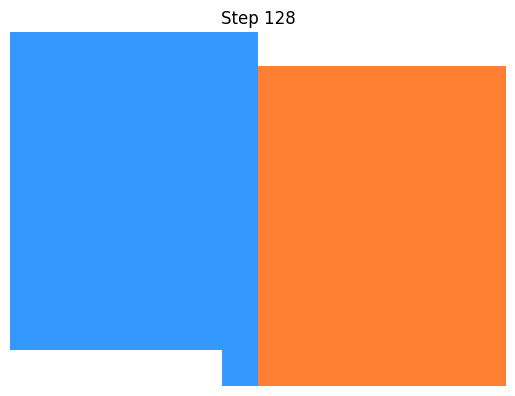

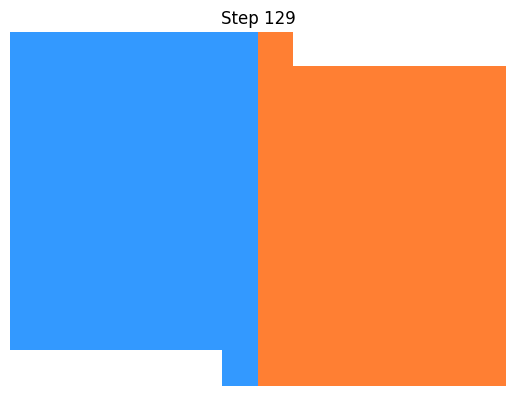

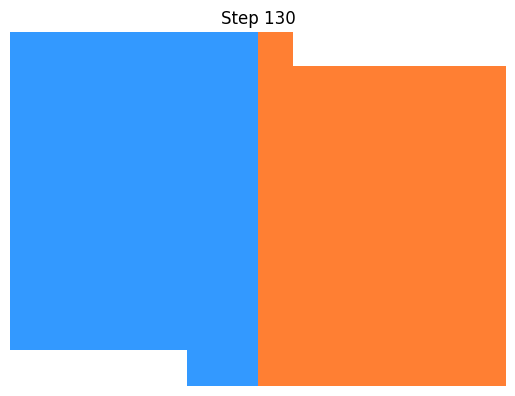

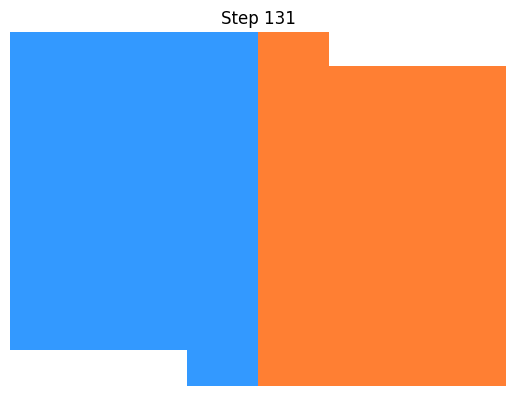

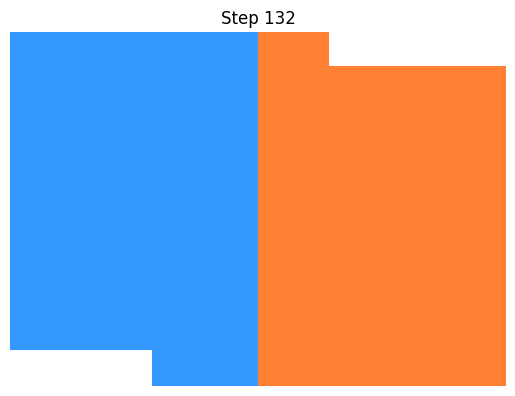

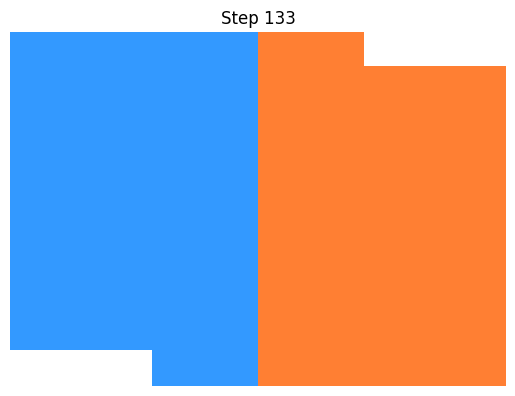

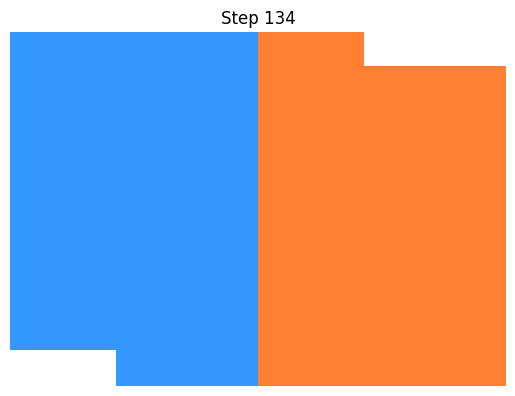

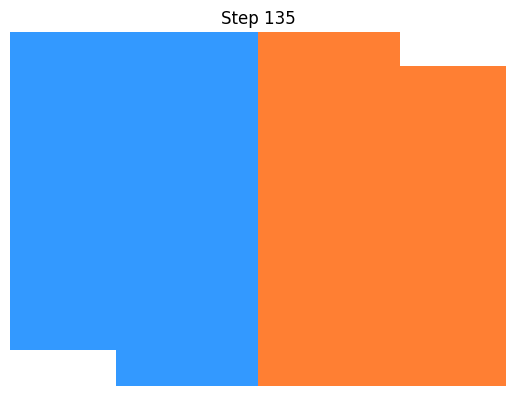

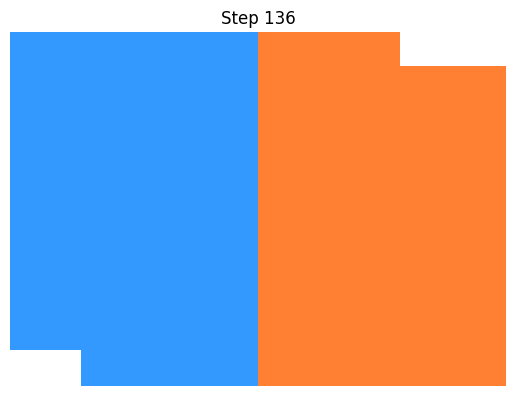

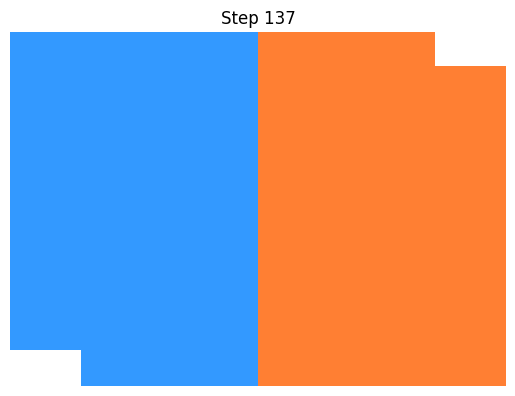

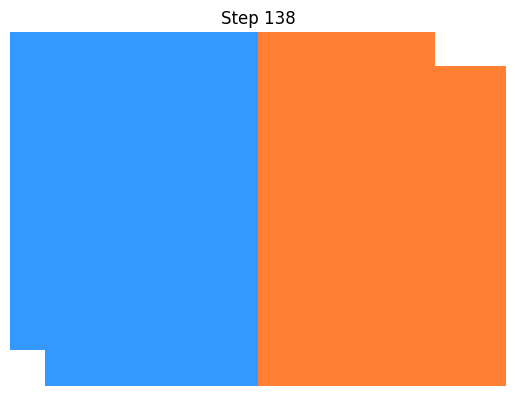

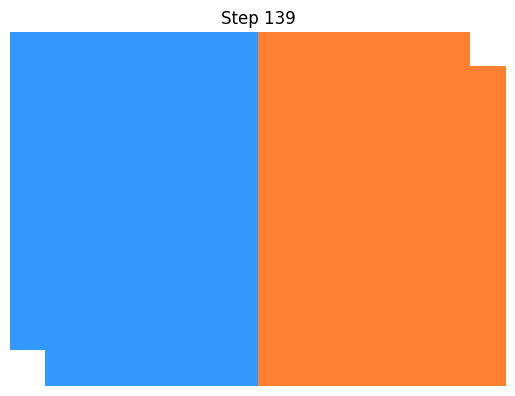

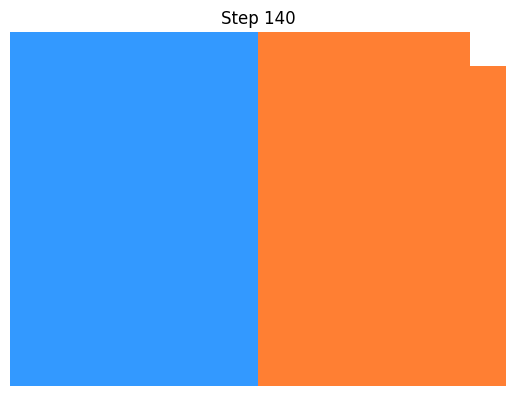

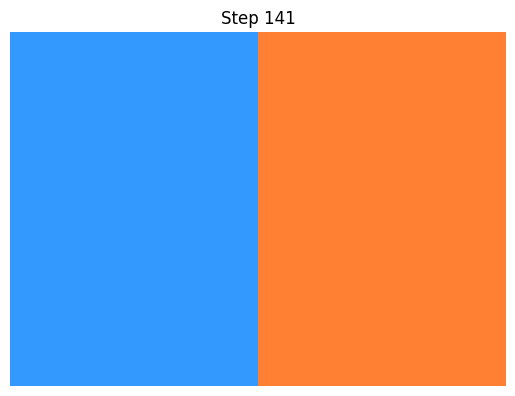

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

DIRS = [(-1,0), (1,0), (0,-1), (0,1)]

# Simple DFS generator
def dfs(grid, start, agent_id, col_start, col_end):
    stack = [start]
    rows, cols = grid.shape
    visited = set()

    while stack:
        r, c = stack.pop()

        if (r, c) in visited:     continue
        if not (0 <= r < rows):   continue
        if not (0 <= c < cols):   continue
        if not (col_start <= c < col_end): continue
        if grid[r][c] != 0:       continue

        # Paint it
        grid[r][c] = agent_id
        visited.add((r, c))
        yield grid.copy()

        # Add neighbors
        for dr, dc in DIRS:
            stack.append((r + dr, c + dc))


def run_sim(rows=10, cols=14):
    grid = np.zeros((rows, cols), dtype=int)
    mid = cols // 2
    states = [grid.copy()]

    a1 = dfs(grid, (0, 0),          1, 0, mid)
    a2 = dfs(grid, (rows-1, cols-1), 2, mid, cols)

    active1 = active2 = True

    while active1 or active2:
        if active1:
            try: states.append(next(a1).copy())
            except StopIteration: active1 = False

        if active2:
            try: states.append(next(a2).copy())
            except StopIteration: active2 = False

    return states


def show(grid, title=""):
    rows, cols = grid.shape
    col = np.zeros((rows, cols, 3))

    col[grid==0] = [1,1,1]
    col[grid==1] = [0.2,0.6,1.0]
    col[grid==2] = [1.0,0.5,0.2]

    plt.imshow(col)
    plt.title(title)
    plt.axis("off")
    plt.show()


# ---- MAIN ----
frames = run_sim()

for i, g in enumerate(frames):
    show(g, f"Step {i+1}")
    time.sleep(0.02)
